In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


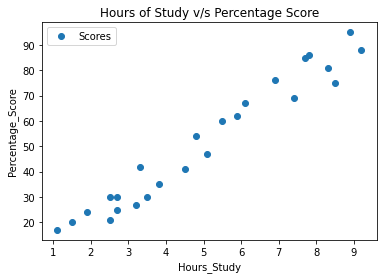

In [6]:
data.plot(x='Hours', y= 'Scores', style = 'o')
plt.title('Hours of Study v/s Percentage Score')
plt.xlabel('Hours_Study')
plt.ylabel('Percentage_Score')
plt.show()

In [7]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [11]:
from sklearn.linear_model import LinearRegression
Regressor1 = LinearRegression()
Regressor1.fit(X,Y)

LinearRegression()

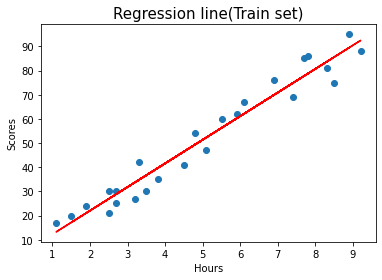

In [12]:
line = Regressor1.coef_*X+Regressor1.intercept_
plt.title("Regression line(Train set)",fontsize=15)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.scatter(X,Y)
plt.plot(X,line,color='red');
plt.show()

In [13]:
print(Y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


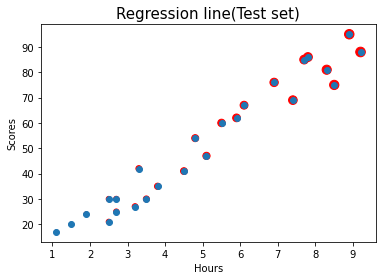

In [14]:
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Regression line(Test set)",fontsize=15)
plt.scatter(X,Y,line,color='red')
plt.scatter(X,Y)
plt.show()

In [15]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
Y_pred = Regressor1.predict(X_test)
print(Y_pred)

[17.14737849 33.76624426 74.8246185  26.92318188 60.16091341]


In [17]:
df = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
df

,Actual,Predicted
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913


In [18]:
print("Training Score: ", Regressor1.score(X_train, Y_train))
print("Testing Score: ", Regressor1.score(X_test,Y_test))

Training Score:  0.9512837351709387
Testing Score:  0.9491748734859171


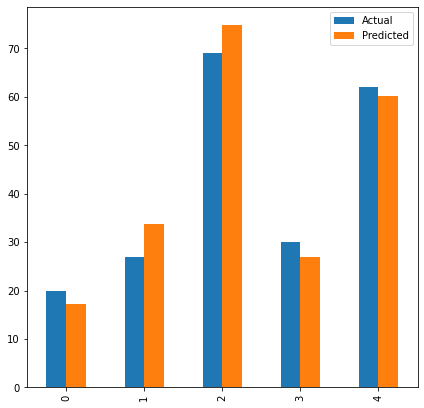

In [19]:
df.plot(kind = 'bar', figsize = (7,7))
plt.show()

In [20]:
import numpy as np
from sklearn import metrics

print(" Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, Y_pred))
print(" Mean Squared Error: ",metrics.mean_squared_error(Y_test,Y_pred))
print(" Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print(" Explained Variance Score: ",metrics.explained_variance_score(Y_test,Y_pred))

 Mean Absolute Error:  4.071877793635608
 Mean Squared Error:  20.1389481299402
 Root Mean Squared Error:  4.487643939746134
 Explained Variance Score:  0.951522433518808


In [21]:
hours = 9.25
pred_score = Regressor1.predict([[9.25]])
print(" The Predicted Score of the Student is :",pred_score)

 The Predicted Score of the Student is : [92.90985477]
